In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [11]:
# The tech stocks we'll use for this analysis
tech_list = ['BABA', 'EBAY', 'WMT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [12]:
company_list = [BABA, EBAY, WMT, AMZN]
company_name = ["Alibaba Group Holding Limited", "eBay Inc.", "Walmart Inc.", "Amazon.com, Inc."]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-11-08,3579.000000,3487.860107,3523.239990,3488.979980,3074000.0,3488.979980,"Amazon.com, Inc."
2021-11-09,3593.770020,3501.429932,3515.250000,3576.229980,4294900.0,3576.229980,"Amazon.com, Inc."
2021-11-10,3605.449951,3463.090088,3563.870117,3482.050049,4027400.0,3482.050049,"Amazon.com, Inc."
2021-11-11,3543.239990,3467.469971,3513.000000,3472.500000,2264400.0,3472.500000,"Amazon.com, Inc."
2021-11-12,3540.729980,3447.050049,3485.000000,3525.149902,2688500.0,3525.149902,"Amazon.com, Inc."
2021-11-15,3593.879883,3525.810059,3537.000000,3545.679932,2929700.0,3545.679932,"Amazon.com, Inc."
2021-11-16,3576.500000,3525.149902,3539.000000,3540.699951,2217100.0,3540.699951,"Amazon.com, Inc."
2021-11-17,3587.250000,3545.350098,3564.719971,3549.000000,2560300.0,3549.000000,"Amazon.com, Inc."
2021-11-18,3704.199951,3561.000000,3566.350098,3696.060059,5703500.0,3696.060059,"Amazon.com, Inc."


In [13]:
# Summary Stats
BABA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,215.972401,210.785564,213.732306,213.232619,2.067918e+07,213.232619
std,37.121302,36.695135,37.038395,36.969404,1.471660e+07,36.969404
min,141.899994,138.429993,139.380005,139.630005,7.650300e+06,139.630005
25%,178.107494,173.314995,176.730000,175.917500,1.286298e+07,175.917500
50%,219.540001,215.625000,218.000000,218.700005,1.651980e+07,218.700005
75%,241.139996,235.125000,238.057499,237.854996,2.304088e+07,237.854996
max,280.609985,275.665985,278.799988,279.959991,1.418300e+08,279.959991


In [14]:
# General info
BABA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-11-20 to 2021-11-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


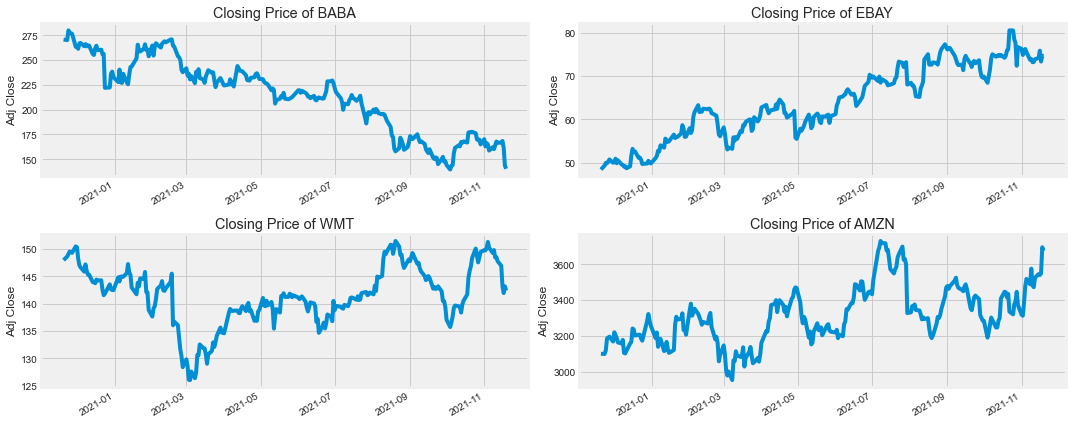

In [15]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

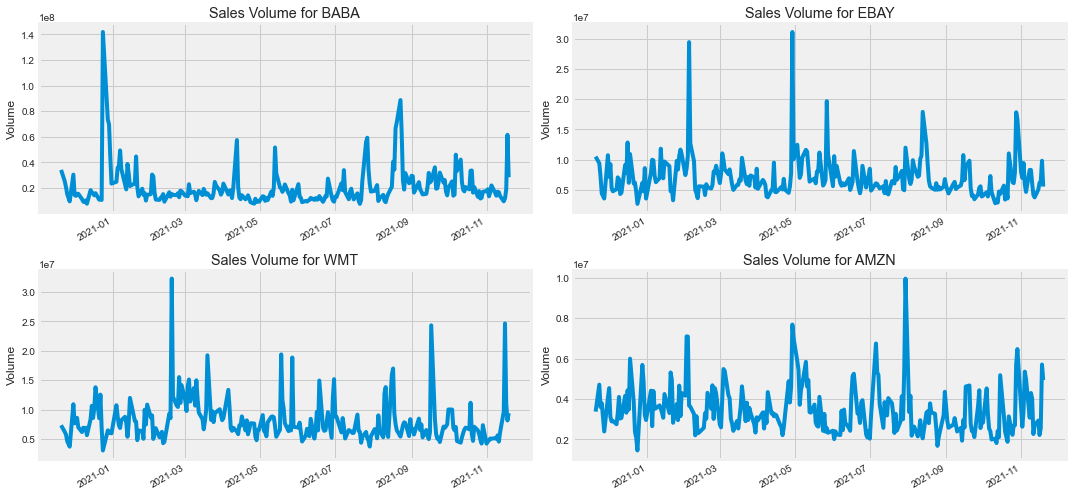

In [16]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [17]:
#Moving Average of Stocks
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

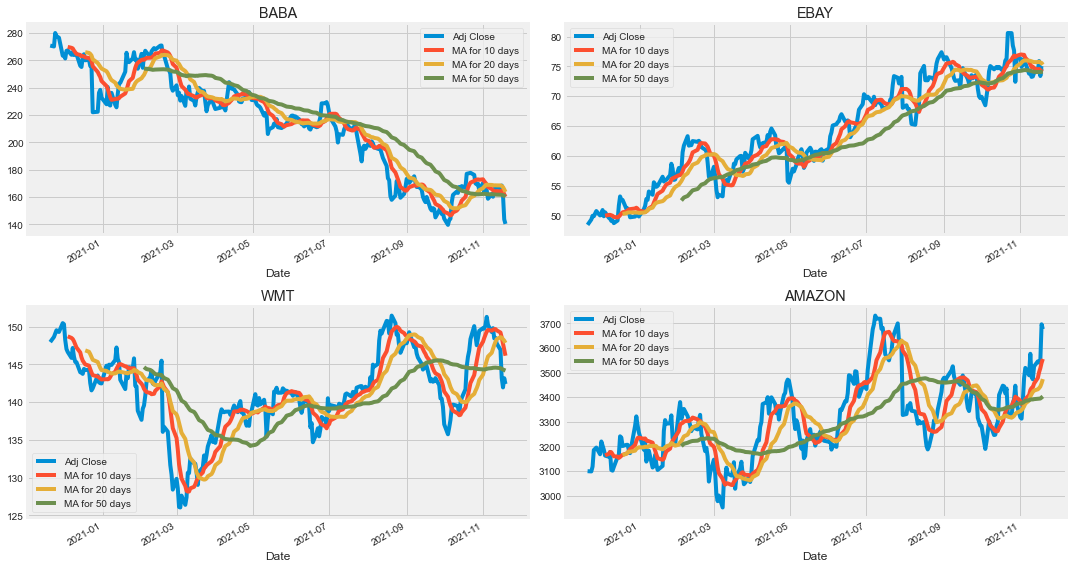

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

BABA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('BABA')

EBAY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('EBAY')

WMT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('WMT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

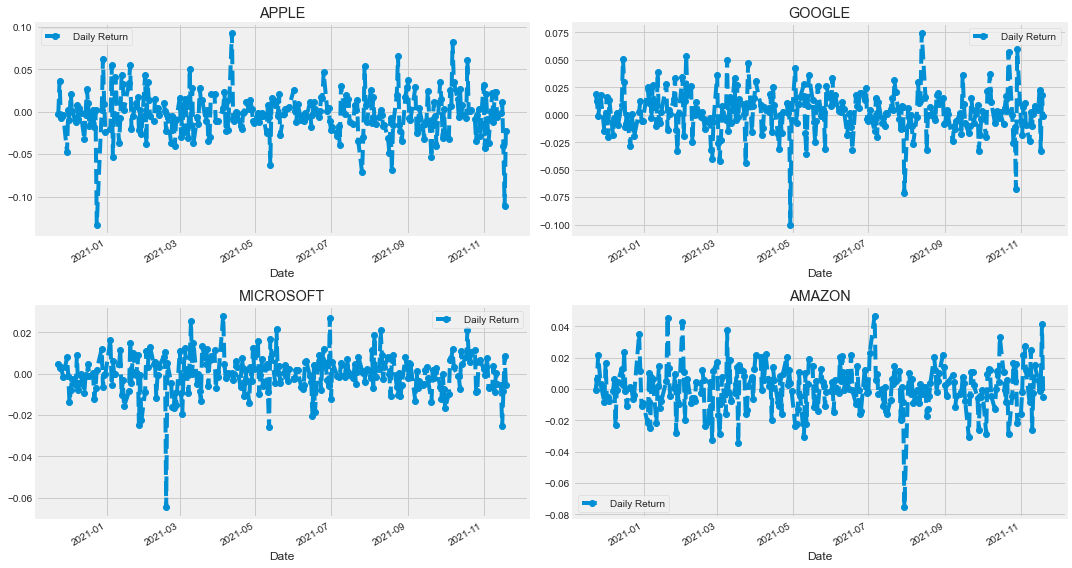

In [19]:
#Daily return of the stock on average
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

BABA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

EBAY['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

WMT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

/Users/simransharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/simransharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/simransharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

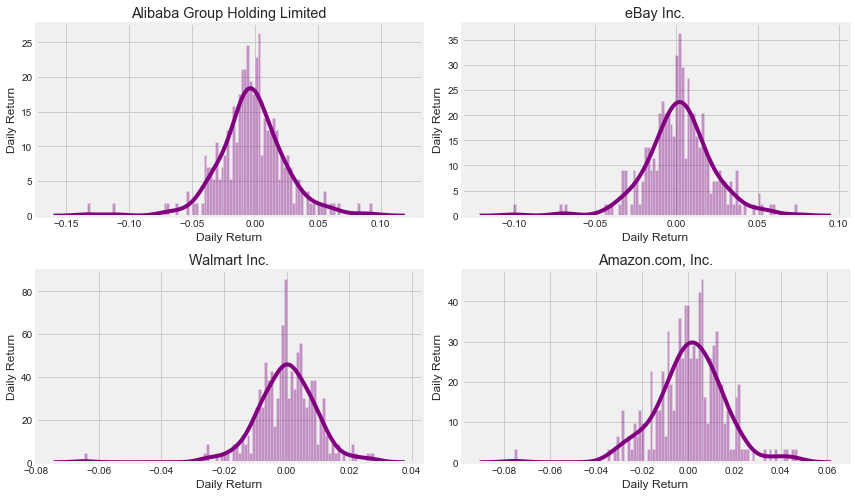

In [20]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

In [21]:
#Corelation between different stocks closing prices
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head()

Symbols,BABA,EBAY,WMT,AMZN
Date,,,,
2020-11-20,270.739990,48.423145,147.942886,3099.399902
2020-11-23,270.109985,49.322613,148.622314,3098.389893
2020-11-24,279.959991,49.945324,149.045761,3118.060059
2020-11-25,277.720001,49.866249,149.508560,3185.070068
2020-11-27,276.480011,50.745949,149.282089,3195.340088


In [22]:
# Make a new tech returns DataFrame
tech_rates = closing_df.pct_change()
tech_rates.head()

Symbols,BABA,EBAY,WMT,AMZN
Date,,,,
2020-11-20,NaN,NaN,NaN,NaN
2020-11-23,-0.002327,0.018575,0.004593,-0.000326
2020-11-24,0.036467,0.012625,0.002849,0.006349
2020-11-25,-0.008001,-0.001583,0.003105,0.021491
2020-11-27,-0.004465,0.017641,-0.001515,0.003224


/Users/simransharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


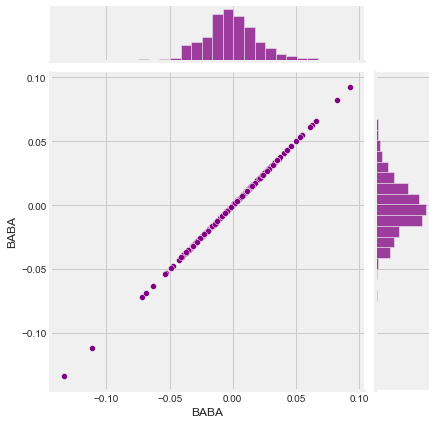

In [30]:
# Comparing BABA to itself should show a perfectly linear relationship
sns.jointplot('BABA', 'BABA', tech_rates, kind='scatter', color='purple')

/Users/simransharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


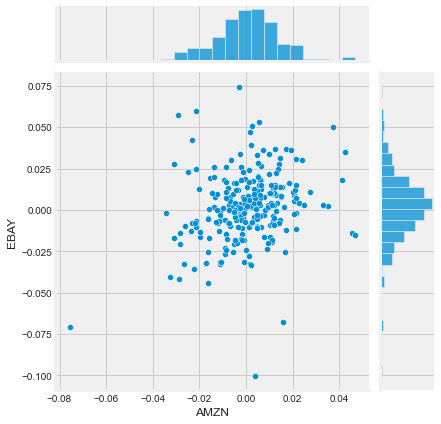

In [26]:
# We'll use joinplot to compare the daily returns of Amazon and Ebay
sns.jointplot('AMZN', 'EBAY', tech_rates, kind='scatter')

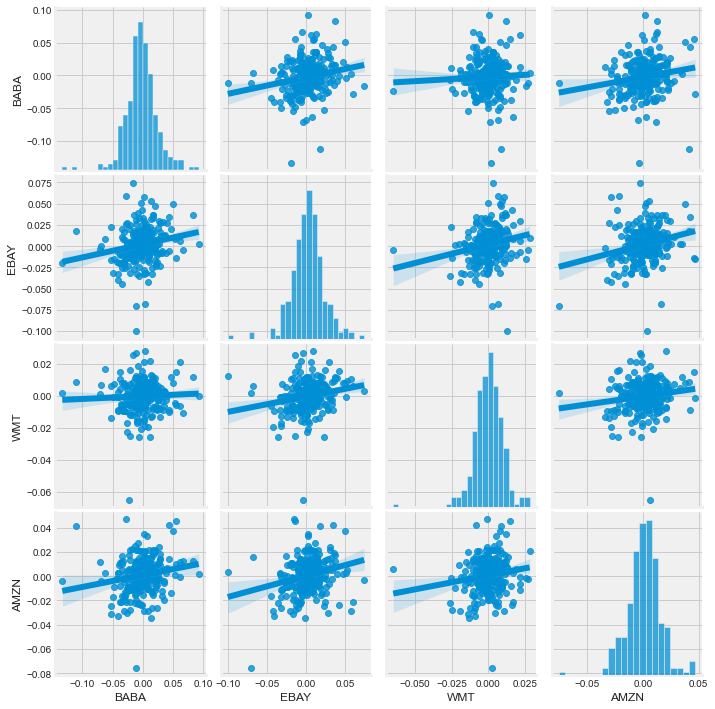

In [27]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rates, kind='reg')

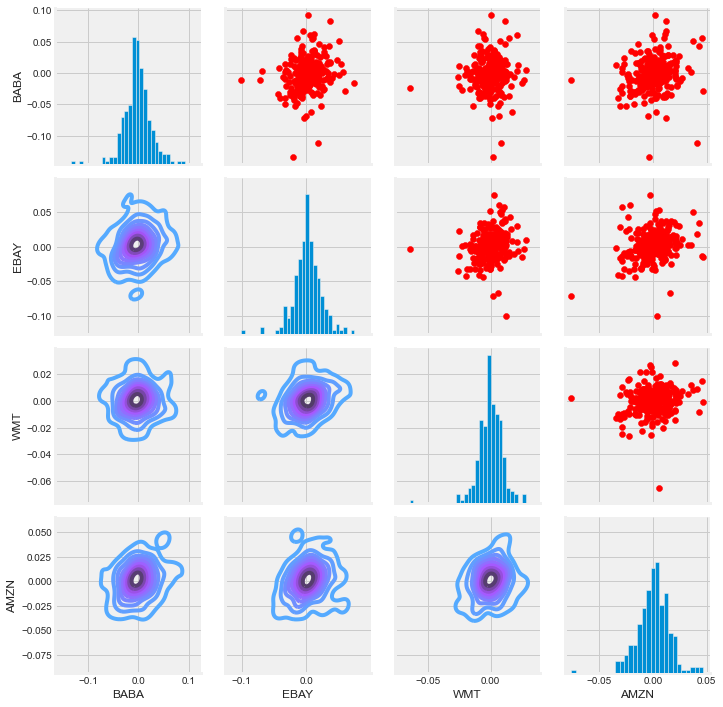

In [29]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rates.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='red')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

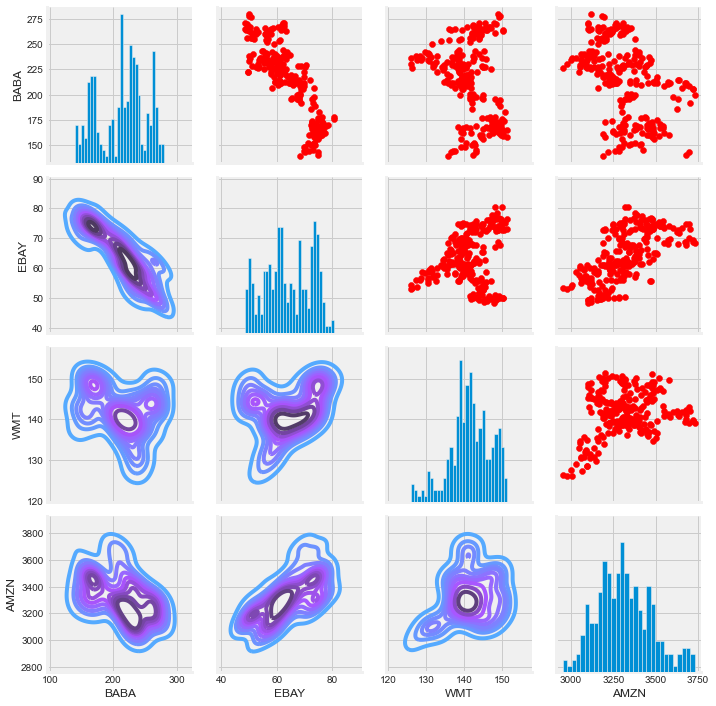

In [32]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='red')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

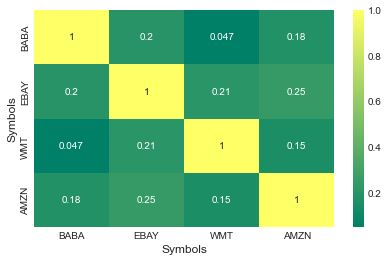

In [33]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rates.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

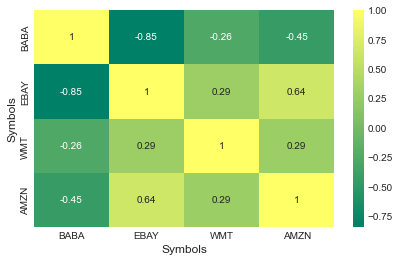

In [34]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

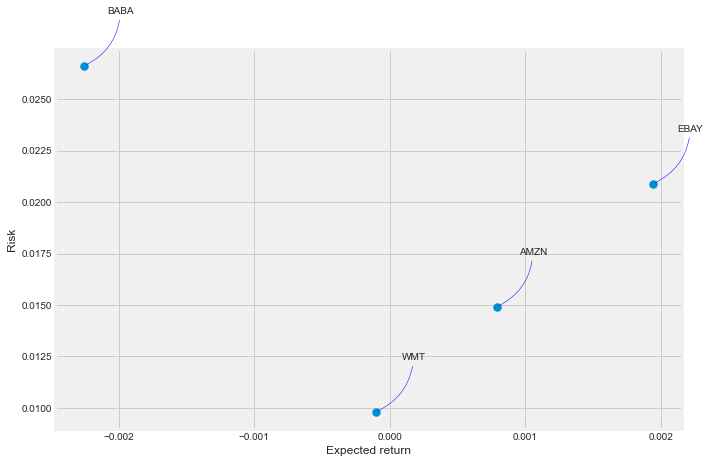

In [35]:
#value do we put at risk by investing in a particular stock
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
price = tech_rates.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(price.mean(), price.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(price.columns, price.mean(), price.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [36]:
#Predicting the closing price stock price
df = DataReader('EBAY', data_source='yahoo', start='2014-01-01', end=datetime.now())

In [37]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,23.135523,22.723064,22.748316,23.093433,15124190.0,22.237179
2014-01-02,23.148148,22.685184,23.135523,22.702021,23698699.0,21.860283
2014-01-03,22.807240,22.386364,22.765152,22.415825,22783939.0,21.584698
2014-01-06,22.079124,21.553030,22.053871,21.792929,42542280.0,20.984896
2014-01-07,22.319023,21.877104,22.049664,22.251684,33442200.0,21.426641
...,...,...,...,...,...,...
2021-11-15,76.239998,74.000000,74.470001,74.209999,5079300.0,74.209999
2021-11-16,76.580002,74.190002,74.300003,75.889999,6200400.0,75.889999
2021-11-17,75.919998,72.989998,75.800003,73.379997,6393300.0,73.379997


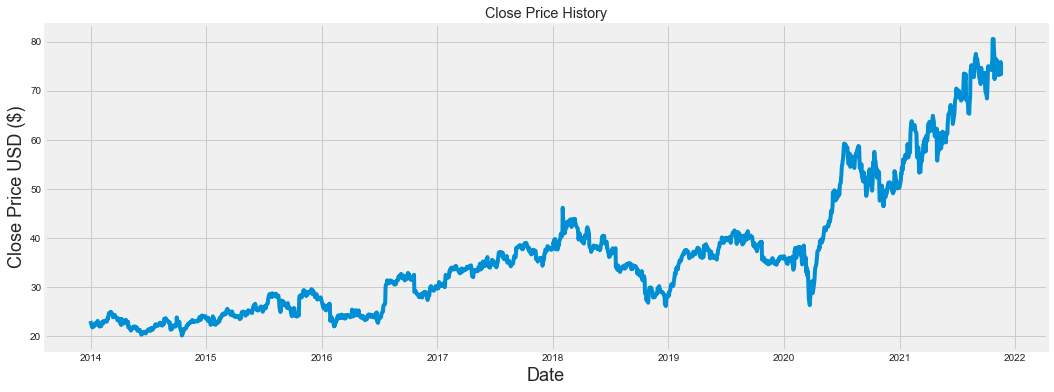

In [38]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [39]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1889

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04867626],
       [0.04220004],
       [0.03746472],
       ...,
       [0.88070516],
       [0.90287653],
       [0.90138735]])

In [41]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape
                

[array([0.04867626, 0.04220004, 0.03746472, 0.02715844, 0.03474889,
       0.03126704, 0.02917793, 0.02980465, 0.03245086, 0.03537561,
       0.04115549, 0.0408073 , 0.03704689, 0.0436624 , 0.04547298,
       0.04916375, 0.04519444, 0.03481851, 0.03676835, 0.03001357,
       0.03690762, 0.03704689, 0.03140631, 0.03502742, 0.0392753 ,
       0.04519444, 0.04672645, 0.04108584, 0.04477661, 0.04839773,
       0.04902445, 0.04797992, 0.0506261 , 0.047771  , 0.04930301,
       0.04672645, 0.05863436, 0.05758981, 0.06587663, 0.0728403 ,
       0.0758347 , 0.07263141, 0.07785416, 0.07646142, 0.07952546,
       0.07785416, 0.07200466, 0.06726937, 0.07033339, 0.06141984,
       0.06169838, 0.06643373, 0.06935845, 0.06559806, 0.06434459,
       0.06323042, 0.06030564, 0.05884328, 0.05375977, 0.05083502])]
[0.050904638978342354]

[array([0.04867626, 0.04220004, 0.03746472, 0.02715844, 0.03474889,
       0.03126704, 0.02917793, 0.02980465, 0.03245086, 0.03537561,
       0.04115549, 0.0408073 , 0.0

In [44]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1829/1829 [==============================] - 29s 15ms/step - loss: 0.0012


In [45]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.9817265318860484

/Users/simransharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


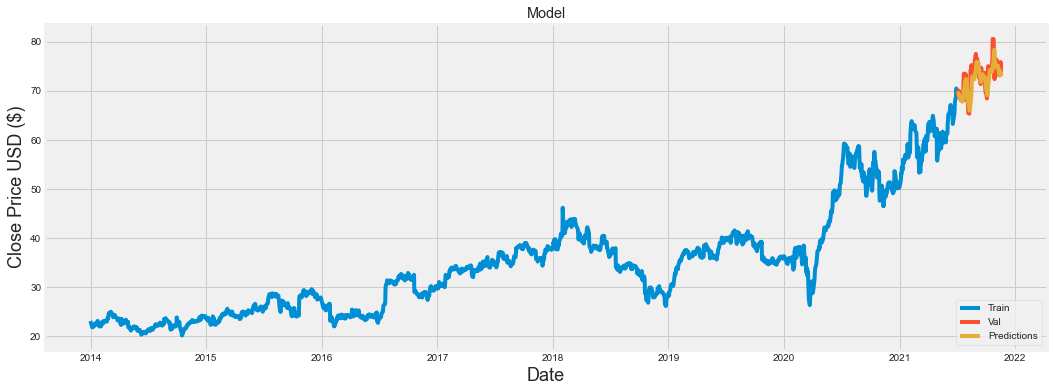

In [46]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [47]:
valid

,Close,Predictions
Date,,
2021-07-02,70.080002,69.404839
2021-07-06,69.019997,69.533211
2021-07-07,70.070000,69.234108
2021-07-08,68.650002,69.189270
2021-07-09,69.459999,68.826218
...,...,...
2021-11-15,74.209999,73.148621
2021-11-16,75.889999,73.327461
2021-11-17,73.379997,74.020607
